# 데이터 처리 심화

### 주요 내용

1. 변수 수정, 추가 및 제거
2. 변수 형식 변환
3. 결측값 처리 및 파생변수 생성

<br>

### 목표 
1. 분석 목적에 맞게 변수를 수정하고 파생 변수를 추가할 수 있다.
2. 날짜 등 변수 형식을 활용할 수 있다.
3. 결측값을 적절한 값으로 대체하는 방법을 확인한다.


<br>
<hr>
<br>

<br>

## 1. 변수(열)의 수정, 추가, 제거

**pandas**의 기본 기능과 메서드를 활용하여 변수를 추가 하거나 수정, 업데이트하거나 제거 가능  
변수를 선택하듯 **=** 을 활용해서 변수를 추가하거나 업데이트 가능

### 1.1. 변수 수정 및 추가

In [5]:
# 라이브러리 불러오기
import pandas as pd


# 예제 만들기 : 딕셔너리를 활용한 DataFrame 생성
df_own = pd.DataFrame({'FIRST' : ['A', 'B', 'C', 'D'],
                       'SECOND': [7,6,5,8], 
                       'THIRD' : pd.date_range('2023-01-01', periods=4, freq='W-SAT')})
df_own

,FIRST,SECOND,THIRD
0,A,7,2023-01-07
1,B,6,2023-01-14
2,C,5,2023-01-21
3,D,8,2023-01-28


In [6]:
# 변수이름을 활용한 변수선택
df_own['SECOND']

0    7
1    6
2    5
3    8
Name: SECOND, dtype: int64

In [7]:
# =을 활용한 추가
df_own['FOURTH'] = 0
df_own

,FIRST,SECOND,THIRD,FOURTH
0,A,7,2023-01-07,0
1,B,6,2023-01-14,0
2,C,5,2023-01-21,0
3,D,8,2023-01-28,0


In [8]:
# =을 활용한 업데이트
df_own['FOURTH'] = df_own['SECOND'] + 1
df_own

,FIRST,SECOND,THIRD,FOURTH
0,A,7,2023-01-07,8
1,B,6,2023-01-14,7
2,C,5,2023-01-21,6
3,D,8,2023-01-28,9


<br>

### 1.2. 객체 메서드와 Series 메서드의 비교

특히 날짜시간 변수의 경우 월, 일, 요일, 시간 등 다양한 요소를 추출해서 변수로 추가할 수 있음  
Python은 개발언어로 객체의 형식에 매우 엄격하므로 메서드의 구분 필요  
개별 날짜에 적용할 수 있는 메서드가 아닌 **pandas**의 **Series** 메서드 활용을 추천 

In [9]:
# []와 for를 활용한 파생변수 생성
df_own.loc[0, 'THIRD'].weekday()
    ## 0~6: 월~일
    ## 5: 토
    
    ## 하나의 값에 대해서는 메서드 활용가능

5

In [10]:
# Series에 대해서는 Series의 메서드만 활용 가능
# df_own['THIRD'].weekday()

In [11]:
# df_own['THIRD'].apply(lambda x: x.weekday())
# df_own

<br>

pandas의 *dt.weekday*를 활용하면 훨씬 손쉽게 파생변수 생성 가능
 * 참고: [dt.weekday](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html)

In [12]:
# pandas의 dt.weekday 활용
df_own['THIRD'].dt.weekday

0    5
1    5
2    5
3    5
Name: THIRD, dtype: int32

In [13]:
df_own['WEEKDAY'] = df_own['THIRD'].dt.weekday

In [14]:
df_own

,FIRST,SECOND,THIRD,FOURTH,WEEKDAY
0,A,7,2023-01-07,8,5
1,B,6,2023-01-14,7,5
2,C,5,2023-01-21,6,5
3,D,8,2023-01-28,9,5


<br>

### 1.3. 조건을 활용한 값 변경, 생성

조건을 활용해 일부 관측치를 선택하듯이, 조건을 설정하고 변수를 추가하거나 업데이트 가능

In [15]:
# 조건을 활용한 일부 관측치 선택
df_own.loc[df_own['FIRST'].isin(['A','B'])]

,FIRST,SECOND,THIRD,FOURTH,WEEKDAY
0,A,7,2023-01-07,8,5
1,B,6,2023-01-14,7,5


In [16]:
# 조건을 활용한 일부 관측치의 특정 변수 값 변경
df_own.loc[df_own['FIRST'].isin(['A','B']), 'FOURTH']

0    8
1    7
Name: FOURTH, dtype: int64

In [17]:
df_own.loc[df_own['FIRST'].isin(['A','B']), 'FOURTH'] = 9999

In [18]:
df_own

,FIRST,SECOND,THIRD,FOURTH,WEEKDAY
0,A,7,2023-01-07,9999,5
1,B,6,2023-01-14,9999,5
2,C,5,2023-01-21,6,5
3,D,8,2023-01-28,9,5


In [19]:
# 일부 관측치만 값 생성
df_own.loc[df_own['FIRST'].isin(['A','B']), 'OPTIONAL'] = 1
df_own
    ## NaN := 결측값(missing)

,FIRST,SECOND,THIRD,FOURTH,WEEKDAY,OPTIONAL
0,A,7,2023-01-07,9999,5,1.0
1,B,6,2023-01-14,9999,5,1.0
2,C,5,2023-01-21,6,5,NaN
3,D,8,2023-01-28,9,5,NaN


<br>

### 1.4. 변수 제거

*drop()* 은 관측치와 변수를 제거할 수 있는데 **index**와 **columns**를 활용  
`axis=`옵션에 따라 `axis=0`이면 관측치를 제거하거 `axis=1`이면 변수를 제거  

`columns=`이라는 옵션을 명시해서 변수를 제거하는 것이 가장 명확하고 실수를 줄일 수 있음

In [20]:
# drop()을 활용한 관측치/변수 제거
df_own.drop('FOURTH', axis=1)
    # axis = 0 : 관측치
    # axis = 1 : 변수

,FIRST,SECOND,THIRD,WEEKDAY,OPTIONAL
0,A,7,2023-01-07,5,1.0
1,B,6,2023-01-14,5,1.0
2,C,5,2023-01-21,5,NaN
3,D,8,2023-01-28,5,NaN


In [21]:
# drop()을 활용한 관측치/변수 제거(columns 활용)
df_own.drop(columns=['FOURTH'])
  

,FIRST,SECOND,THIRD,WEEKDAY,OPTIONAL
0,A,7,2023-01-07,5,1.0
1,B,6,2023-01-14,5,1.0
2,C,5,2023-01-21,5,NaN
3,D,8,2023-01-28,5,NaN


In [22]:
# drop( ) 실행 후 원본 데이터는 변함이 없음
df_own

,FIRST,SECOND,THIRD,FOURTH,WEEKDAY,OPTIONAL
0,A,7,2023-01-07,9999,5,1.0
1,B,6,2023-01-14,9999,5,1.0
2,C,5,2023-01-21,6,5,NaN
3,D,8,2023-01-28,9,5,NaN


In [23]:
# 원본 데이터의 업데이트
df_own = df_own.drop(columns=['FOURTH'])
df_own

,FIRST,SECOND,THIRD,WEEKDAY,OPTIONAL
0,A,7,2023-01-07,5,1.0
1,B,6,2023-01-14,5,1.0
2,C,5,2023-01-21,5,NaN
3,D,8,2023-01-28,5,NaN


<br>

### 1.5. 변수 이름 변경

변수이름을 바꾸고 싶을 때는 **DataFrame**의 메서드 *rename()* 을 활용  
이때 `columns=` 옵션을 활용하고 딕셔너리 형식으로 기존변수이름과 새변수이름을 콜론으로 연결

In [24]:
# rename() 활용 변수 이름 바꾸기 
df_own.rename(columns = {'FIRST':'var1', 'SECOND':'var2'})

,var1,var2,THIRD,WEEKDAY,OPTIONAL
0,A,7,2023-01-07,5,1.0
1,B,6,2023-01-14,5,1.0
2,C,5,2023-01-21,5,NaN
3,D,8,2023-01-28,5,NaN


<br>

#### [실습] df_sp를 활용

1. 'math score', 'reading score', 'writing score'를 합한 변수 'total'을 **df_sp**에 추가
2. 1의 'total'이 270이상인 학생들만 'EX'라는 값을 갖는 'grade' 변수 추가
3. 'math score', 'reading score', 'writing score' 중 한과목이라도 40보다 작은지 확인하기
4. 3.의 결과를 활용해서 세 점수 중 하나라도 40점 미만은 학생은 'grade'를 'FAIL'로 수정하기
5. 변수 'grade'의 이름을 'class'로 바꾸기
6. 변수 'total'을 제거하기



In [30]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
# 1. 답안
df_sp['total']=df_sp['math score'] + df_sp['reading score'] + df_sp['writing score']
df_sp.filter(regex='score').sum(axis=1)

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Length: 1000, dtype: int64

In [34]:
cond_ex=df_sp['total']>=270
cond_ex


0      False
1      False
2       True
3      False
4      False
       ...  
995     True
996    False
997    False
998    False
999    False
Name: total, Length: 1000, dtype: bool

In [ ]:
# 3. 답안
# (df_sp['math score']<40) | (df_sp['reading score']<40) | (df_sp['writing score']<40)
# (df_sp.filter(regex='score') < 40).any(axis=1)

<br>
<hr>
<br>

## 2. 결측값 처리

결측값은 다양한 이유로 발생
- 애초에 값이 없는 경우
- 값이 있으나 사람 실수로 누락한 경우
- 센서, 통신망 등의 오류로 값이 들어오지 않은 경우

먼저 결측값 존재 여부 확인하고, 대체를 할 지 그대로 둘 지를 결정  
대체를 한다면 어떤 값으로 채울지도 고민하여 지정

In [ ]:
# 예제 데이터 불러오기
df_na = pd.read_csv('./data/data_dupna.csv')
df_na
    # NaN : 결측

<br>

> 아래의 명령어를 활용하면 전체 데이터에서 결측값이 있는 관측치나 변수를 확인할 수 있습니다. 


In [ ]:
# 하나라도 결측값이 있는 변수 확인
df_na.isnull().any(axis=0)

In [ ]:
# 하나라도 결측값이 있는 관측치 확인
df_na[df_na.isnull().any(axis=1)]

<br>

### 2.1. 결측값 포함 관측치 제거

결측값이 있는 관측치에 대응하는 가장 간단한 방법은 결측치를 포함한 변수나 관측치를 제거하는 것

In [ ]:
# 하나라도 결측값이 있는 관측치 제거
df_na.dropna()

In [ ]:
# 특정 변수 기준 결측값이 있는 관측치 제거
df_na.dropna(subset=['info1'])

<br>

### 2.2. 결측값 대체

일반적으로 결측값을 그대로 두거나 다음과 같이 결측값을 적절한 값으로 대체하고 활용

In [ ]:
# 모든 결측값을 일괄 대체
df_na.fillna(value=0)

In [ ]:
# 변수별 결측값 대체 지정
df_na.fillna(value={'info1':0, 'info2':'NA'})

In [ ]:
# 가장 앞쪽의 결측이 아닌 값으로 대체
    ## 센서 등의 값 누락에 활용
df_na.fillna(method='ffill')

In [ ]:
# 이후 값중 결측이 아닌 값으로 대체
    ## groupby()를 활용하여 id 등 범위 내 대체
df_na.groupby('id').fillna(method='bfill')

In [ ]:
# 특정한 변수만 결측값 대체
    ## groupby()와 fillna()를 활용할 경우 그룹변수가 사라짐
    ## 특정 변수만 선택해서 결측값 대체하고 업데이트
df_na['info2'] = df_na.groupby('id')['info2'].fillna(method='ffill')    
df_na

<br>
<hr>
<br>

## 3. 변수 형식 변환 및 파생변수 생성

*read_csv()* 로 데이터를 불러오면 적당한 형식으로 지정되는데, 가끔 형식을 직접 바꿔야할 상황이 있음  
상황에 따라 날짜에서 요일을 추출하듯이 기존 변수를 활용해서 새로운 변수를 추가해서 분석에 활용해야하는 경우도 있음  

<br>

### 3.1. 변수 형식의 확인/변환
**DataFrame**에서는 다음과 같은 Series 형식을 활용

+ float: 실수(소수점을 포함한 숫자)
+ int: 정수(integer)
+ datetime: 날짜시간
+ bool: 불/불린(True 혹은 False)
+ category: 범주형
+ object: 문자형(string) 혹은 그 외

*.dtypes* 를 활용하면 변수 형식을 확인 가능  
*.astype()* 을 활용해서 변수 형식을 변환 가능



In [42]:
# 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# 변수 형식 확인
df_ins.dtypes

In [ ]:
# children을 float으로 변환
df_ins['children'].astype('float')

In [ ]:
# children을 object로 변환
df_ins['children'].astype('object')

In [ ]:
# 기존 변수의 형식 업데이트
df_ins['children'] = df_ins['children'].astype('float')
df_ins.head()

In [ ]:
# 복수 변수의 형식 일괄 업데이트
category_vars = ['sex', 'smoker', 'region']
df_ins[category_vars] = df_ins[category_vars].astype('category')
df_ins.dtypes

In [ ]:
# select_dtypes()의 활용
df_ins.select_dtypes('category')

<br>

#### [실습] df_pr의 활용

1. Pulse2(뛴 후)와 Pulse1(뛰기 전)의 차이를 계산하고 'Diff'로 변수 추가하기
2. `df_pr.dtypes`로 형식 확인하고 `df_pr.nunique()`로 중복값 제거한 값 개수 확인하기
3. 범주형 형식이 적당한 변수 이름 목록 만들기
4. 3.의 변수들을 astype()으로 category 형식으로 변환하고 업데이트 하기
5. Ran, Smokes, Alcohol별 1.의 Diff의 평균 계산하기

In [35]:
df_pr = pd.read_csv('data/PulseRates.csv')
df_pr.head()

,Height,Weight,Age,Gender,Smokes,Alcohol,Exercise,Ran,Pulse1,Pulse2,Year
0,173,57.0,18,2,2,1,2,2,86.0,88.0,93
1,179,58.0,19,2,2,1,2,1,82.0,150.0,93
2,167,62.0,18,2,2,1,1,1,96.0,176.0,93
3,195,84.0,18,1,2,1,1,2,71.0,73.0,93
4,173,64.0,18,2,2,1,3,2,90.0,88.0,93


In [36]:
df_pr['Diff']=df_pr['Pulse2']-df_pr['Pulse1']

In [38]:
df_pr.dtypes
df_pr.nunique()

Height      41
Weight      51
Age         13
Gender       2
Smokes       2
Alcohol      2
Exercise     3
Ran          2
Pulse1      38
Pulse2      54
Year         5
Diff        53
dtype: int64

In [39]:
cat_vars=['Gender','Smokes','Alcohol','Exercise','Ran']
df_pr[cat_vars]=df_pr[cat_vars].astype("category")

In [41]:
df_pr.groupby(['Ran','Smokes','Alcohol'], as_index=False)['Diff'].mean()

,Ran,Smokes,Alcohol,Diff
0,1,1,1,47.666667
1,1,1,2,NaN
2,1,2,1,50.642857
3,1,2,2,53.533333
4,2,1,1,-2.500000
5,2,1,2,-1.000000
6,2,2,1,-0.666667
7,2,2,2,-1.040000


<br>

### 3.2. 수치형 변수의 구간화

수치형 변수는 그대로 활용하기 보다는 구간화하는 경우가 많음  
*cut()* 이나 *qcut()* 함수를 주로 활용

+ *cut()*: 등간격 혹은 주어진 구간 경계로 구간화
+ *qcut()*: 등비율로 구간화

In [43]:
# 연령대 변수 생성
    ## //: 몫 계산
    ## %: 나머지 계산
df_ins['age_grp'] = (df_ins['age'] // 10).astype('category')
df_ins

,age,sex,bmi,children,smoker,region,charges,age_grp
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,3
4,32,male,28.880,0,no,northwest,3866.85520,3
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,5
1334,18,female,31.920,0,no,northeast,2205.98080,1
1335,18,female,36.850,0,no,southeast,1629.83350,1
1336,21,female,25.800,0,no,southwest,2007.94500,2


In [44]:
df_ins['age_grp'] = (df_ins['age'] // 10).apply(lambda x: str(x)+'0대')
df_ins

,age,sex,bmi,children,smoker,region,charges,age_grp
0,19,female,27.900,0,yes,southwest,16884.92400,10대
1,18,male,33.770,1,no,southeast,1725.55230,10대
2,28,male,33.000,3,no,southeast,4449.46200,20대
3,33,male,22.705,0,no,northwest,21984.47061,30대
4,32,male,28.880,0,no,northwest,3866.85520,30대
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,50대
1334,18,female,31.920,0,no,northeast,2205.98080,10대
1335,18,female,36.850,0,no,southeast,1629.83350,10대
1336,21,female,25.800,0,no,southwest,2007.94500,20대


<br>

*cut()* 을 활용해서 등간격으로 구간화할 수 있고, `bins=` 옵션에 적절한 구간값을 직접 넣을 수도 있음

In [45]:
# 등간격으로 구간화하기
pd.cut(df_ins['charges'], bins=10)

0        (13651.585, 19916.44]
1         (1059.225, 7386.729]
2         (1059.225, 7386.729]
3        (19916.44, 26181.296]
4         (1059.225, 7386.729]
                 ...          
1333     (7386.729, 13651.585]
1334      (1059.225, 7386.729]
1335      (1059.225, 7386.729]
1336      (1059.225, 7386.729]
1337    (26181.296, 32446.151]
Name: charges, Length: 1338, dtype: category
Categories (10, interval[float64, right]): [(1059.225, 7386.729] < (7386.729, 13651.585] < (13651.585, 19916.44] < (19916.44, 26181.296] ... (38711.006, 44975.862] < (44975.862, 51240.717] < (51240.717, 57505.573] < (57505.573, 63770.428]]

In [46]:
charges_breaks = [0, 5000, 10000, 20000, 100000000]

In [ ]:
pd.cut(df_ins['charges'], bins=charges_breaks, right=False, labels=['1','2','3','4'])

In [ ]:
# cut()을 활용한 10등급화
df_ins['charges_grp'] = pd.cut(df_ins['charges'], bins=10, labels=range(10))
df_ins

In [ ]:
# 등구간의 관측치 불균형 문제
df_ins['charges_grp'].value_counts()

In [ ]:
# qcut()을 활용한 등비율 구간화
df_ins['charges_grp2'] = pd.qcut(df_ins['charges'], q=10, labels=range(1, 11))
df_ins

In [ ]:
df_ins['charges_grp2'].value_counts()

<br>

#### [실습] 데이터 df_sp 활용

1. cut()으로 'reading score'를 20점 단위로 5개 그룹 변수 추가 
2. cut()으로 'reading score'를 등간격(구간 길이가 동일)으로 5개 그룹 변수 추가
3. qcut()으로 'readiong score'를 등비율로 5 등급화
4. pivot_table()을 활용해서 'parental level of education'과 3.의 그룹 변수로 'math score'의 평균 계산

In [47]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [48]:
pd.cut(df_sp['reading score'], bins=[0,20,40,60,80,100])

0       (60, 80]
1      (80, 100]
2      (80, 100]
3       (40, 60]
4       (60, 80]
         ...    
995    (80, 100]
996     (40, 60]
997     (60, 80]
998     (60, 80]
999    (80, 100]
Name: reading score, Length: 1000, dtype: category
Categories (5, interval[int64, right]): [(0, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100]]

In [49]:
pd.cut(df_sp['reading score'],bins=5)

0       (66.8, 83.4]
1      (83.4, 100.0]
2      (83.4, 100.0]
3       (50.2, 66.8]
4       (66.8, 83.4]
           ...      
995    (83.4, 100.0]
996     (50.2, 66.8]
997     (66.8, 83.4]
998     (66.8, 83.4]
999    (83.4, 100.0]
Name: reading score, Length: 1000, dtype: category
Categories (5, interval[float64, right]): [(16.917, 33.6] < (33.6, 50.2] < (50.2, 66.8] < (66.8, 83.4] < (83.4, 100.0]]

In [50]:
df_sp['r_grp']=pd.qcut(df_sp['reading score'],q=5)

<Axes: xlabel='parental level of education', ylabel='r_grp'>

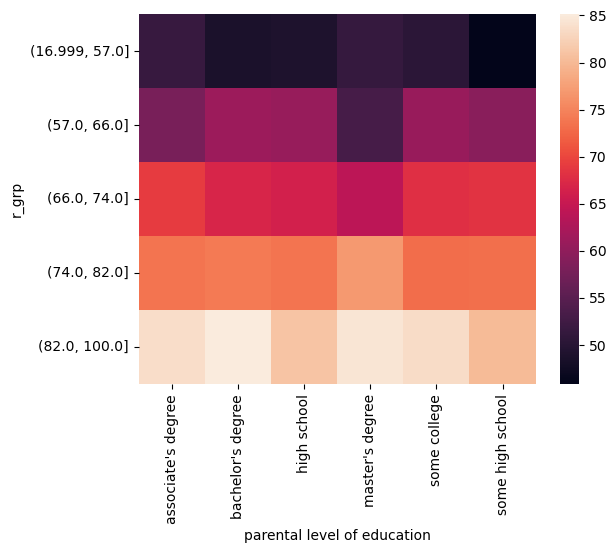

In [52]:
df_sp.pivot_table(values='math score',index="r_grp", columns='parental level of education',aggfunc='mean')

import seaborn as sns
sns.heatmap(df_sp.pivot_table(values='math score',index="r_grp", columns='parental level of education',aggfunc='mean'))

### 3.3. 그룹 내 순위, 이동, 누적 변수 생성

> 데이터 분석 과정에서 그룹별로 순위를 매기거나, 직전 값과 비교를 통해서 변화량 등을 확인하기도 합니다. 뿐만 아니라 이동 평균이나 누적 최댓값 등을 계산하기도 합니다.

In [53]:
# 데이터 불러오기
df_dup = pd.read_csv('data/data_dupna.csv')
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3
0,101,A,2022-01-03,20.0,FC,C887,N,NaN
1,101,C,2022-05-03,120.0,FC,C887,NaN,NaN
2,101,B,2022-04-12,32.0,FC,C887,NaN,N
3,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN
4,103,B,2022-03-02,25.0,FC,C453,NaN,N
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N


In [63]:
# 순위 생성(동점일 경우 평균 등수)
df_dup['amount'].rank(ascending=False)

0    6.0
1    3.0
2    1.0
3    5.0
4    NaN
5    2.0
6    4.0
7    8.0
8    7.0
Name: amount, dtype: float64

In [64]:
# 순위 생성(동점일 경우 index 순)
df_dup['date'].rank(ascending=True, method='first')

0    1.0
1    8.0
2    9.0
3    4.0
4    5.0
5    3.0
6    2.0
7    6.0
8    7.0
Name: date, dtype: float64

In [65]:
# 사용자별 순위 파생변수 추가
df_dup['seq'] = df_dup.groupby('id')['date'].rank(method='min',ascending=False)
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0
1,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0
3,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0


In [67]:
# rank 활용 최종건 선택
df_dup[df_dup['seq']==1]

,id,product_cd,date,amount,channel,info1,info2,info3,seq
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0


In [71]:
# 데이터 정렬 및 날짜 형식 변환
df_dup = df_dup.sort_values(['id','date']).reset_index(drop=True)
# df_dup['date'] = df_dup['date'].astype('datetime64[ns]')
df_dup['date']=pd.to_datetime(df_dup['date'])
df_dup.dtypes

id                     int64
product_cd            object
date          datetime64[ns]
amount               float64
channel               object
info1                 object
info2                 object
info3                 object
seq                  float64
dtype: object

In [72]:
# 그룹별 이동 값 변수 추가
df_dup['date_prev'] = df_dup.groupby('id')['date'].shift()
df_dup

# group by id 내에서만 shift를 합니다.


,id,product_cd,date,amount,channel,info1,info2,info3,seq,date_prev
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0,NaT
1,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0,2022-01-03
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0,2022-04-12
3,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0,NaT
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0,2022-03-02
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0,NaT
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0,NaT
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0,NaT
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0,2022-04-11


In [73]:
# 시차의 계산
df_dup['date_diff'] = df_dup['date'] - df_dup['date_prev']
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq,date_prev,date_diff
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0,NaT,NaT
1,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0,2022-01-03,99 days
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0,2022-04-12,21 days
3,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0,NaT,NaT
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0,2022-03-02,1 days
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0,NaT,NaT
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0,NaT,NaT
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0,NaT,NaT
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0,2022-04-11,0 days


In [74]:
# 그룹별 누적합 계산
df_dup['cum_amount'] = df_dup.groupby('id')['amount'].cumsum()
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq,date_prev,date_diff,cum_amount
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0,NaT,NaT,20.0
1,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0,2022-01-03,99 days,52.0
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0,2022-04-12,21 days,172.0
3,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0,NaT,NaT,25.0
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0,2022-03-02,1 days,NaN
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0,NaT,NaT,92.0
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0,NaT,NaT,31.0
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0,NaT,NaT,15.0
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0,2022-04-11,0 days,33.0


In [75]:
# rolling() 활용 그룹별 이동 평균 계산
df_dup['ma_amount'] = df_dup.groupby('id').rolling(2)['amount'].mean().reset_index(drop=True)
df_dup

,id,product_cd,date,amount,channel,info1,info2,info3,seq,date_prev,date_diff,cum_amount,ma_amount
0,101,A,2022-01-03,20.0,FC,C887,N,NaN,3.0,NaT,NaT,20.0,NaN
1,101,B,2022-04-12,32.0,FC,C887,NaN,N,2.0,2022-01-03,99 days,52.0,26.0
2,101,C,2022-05-03,120.0,FC,C887,NaN,NaN,1.0,2022-04-12,21 days,172.0,76.0
3,103,B,2022-03-02,25.0,FC,C453,NaN,N,2.0,NaT,NaT,25.0,NaN
4,103,C,2022-03-03,NaN,CM,NaN,NaN,NaN,1.0,2022-03-02,1 days,NaN,NaN
5,105,C,2022-02-23,92.0,CM,NaN,NaN,NaN,1.0,NaT,NaT,92.0,NaN
6,201,B,2022-02-16,31.0,FC,C453,NaN,NaN,1.0,NaT,NaT,31.0,NaN
7,204,A,2022-04-11,15.0,CM,NaN,Y,NaN,1.0,NaT,NaT,15.0,NaN
8,204,B,2022-04-11,18.0,CM,NaN,NaN,N,1.0,2022-04-11,0 days,33.0,16.5


## 4. 날짜시간 변수 활용

날짜시간 변수에서 요소를 추출할 수 있고, 날짜시간별로 집계된 데이터로 시각화 가능

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Windows
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

#macOS
# plt.rc('font', family='AppleGothic')
# plt.rc('axes', unicode_minus=False)

In [78]:
df_subway = pd.read_csv('data/서울교통공사_역별일별승하차인원정보_20220731.csv')
df_subway

,날짜,호선,역번호,역명,구분,이용객수
0,2022-01-01,1,150,서울역,승차,18525
1,2022-01-01,1,150,서울역,하차,17087
2,2022-01-01,1,151,시청,승차,5660
3,2022-01-01,1,151,시청,하차,5063
4,2022-01-01,1,152,종각,승차,10046
...,...,...,...,...,...,...
115601,2022-07-31,8,2826,수진,하차,2579
115602,2022-07-31,8,2827,모란,승차,2320
115603,2022-07-31,8,2827,모란,하차,2037
115604,2022-07-31,8,2828,남위례,승차,2126


<Axes: xlabel='날짜', ylabel='이용객수'>

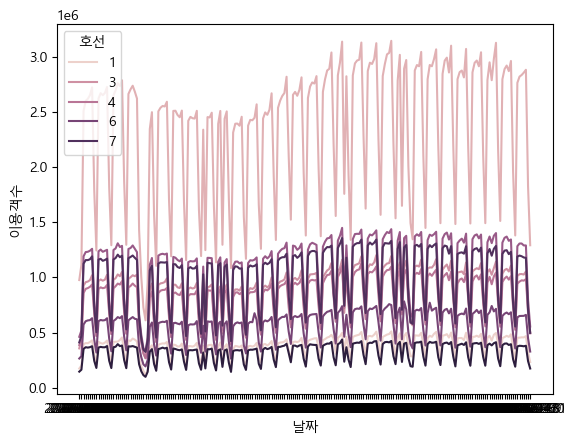

In [80]:
# 형식 변환없이 집계 및 시각화
agg = df_subway.groupby(['날짜','호선'], as_index=False)['이용객수'].sum()
sns.lineplot(data=agg, 
              x='날짜',
              y='이용객수',
              hue='호선')

In [101]:
# to_datetime()을 활용한 형식 변환
df_subway['호선'] = df_subway['호선'].astype('category')
df_subway['날짜'] = pd.to_datetime(df_subway['날짜'])
df_subway

,날짜,호선,역번호,역명,구분,이용객수,요일,월
0,2022-01-01,1,150,서울역,승차,18525,5,1
1,2022-01-01,1,150,서울역,하차,17087,5,1
2,2022-01-01,1,151,시청,승차,5660,5,1
3,2022-01-01,1,151,시청,하차,5063,5,1
4,2022-01-01,1,152,종각,승차,10046,5,1
...,...,...,...,...,...,...,...,...
115601,2022-07-31,8,2826,수진,하차,2579,6,7
115602,2022-07-31,8,2827,모란,승차,2320,6,7
115603,2022-07-31,8,2827,모란,하차,2037,6,7
115604,2022-07-31,8,2828,남위례,승차,2126,6,7


In [82]:
# 요일 변수 생성
df_subway['요일'] = df_subway['날짜'].dt.weekday
df_subway

,날짜,호선,역번호,역명,구분,이용객수,요일
0,2022-01-01,1,150,서울역,승차,18525,5
1,2022-01-01,1,150,서울역,하차,17087,5
2,2022-01-01,1,151,시청,승차,5660,5
3,2022-01-01,1,151,시청,하차,5063,5
4,2022-01-01,1,152,종각,승차,10046,5
...,...,...,...,...,...,...,...
115601,2022-07-31,8,2826,수진,하차,2579,6
115602,2022-07-31,8,2827,모란,승차,2320,6
115603,2022-07-31,8,2827,모란,하차,2037,6
115604,2022-07-31,8,2828,남위례,승차,2126,6


In [83]:
# 월 변수 생성
df_subway['월'] = df_subway['날짜'].dt.month
df_subway

,날짜,호선,역번호,역명,구분,이용객수,요일,월
0,2022-01-01,1,150,서울역,승차,18525,5,1
1,2022-01-01,1,150,서울역,하차,17087,5,1
2,2022-01-01,1,151,시청,승차,5660,5,1
3,2022-01-01,1,151,시청,하차,5063,5,1
4,2022-01-01,1,152,종각,승차,10046,5,1
...,...,...,...,...,...,...,...,...
115601,2022-07-31,8,2826,수진,하차,2579,6,7
115602,2022-07-31,8,2827,모란,승차,2320,6,7
115603,2022-07-31,8,2827,모란,하차,2037,6,7
115604,2022-07-31,8,2828,남위례,승차,2126,6,7


In [84]:
# 날짜별 집계값의 생성
agg = df_subway.groupby(['날짜','호선'], as_index=False)['이용객수'].sum()
agg

,날짜,호선,이용객수
0,2022-01-01,1,173736
1,2022-01-01,2,975559
2,2022-01-01,3,356262
3,2022-01-01,4,386622
4,2022-01-01,5,461184
...,...,...,...
1691,2022-07-31,4,492378
1692,2022-07-31,5,554841
1693,2022-07-31,6,327457
1694,2022-07-31,7,496649


<Axes: xlabel='날짜', ylabel='이용객수'>

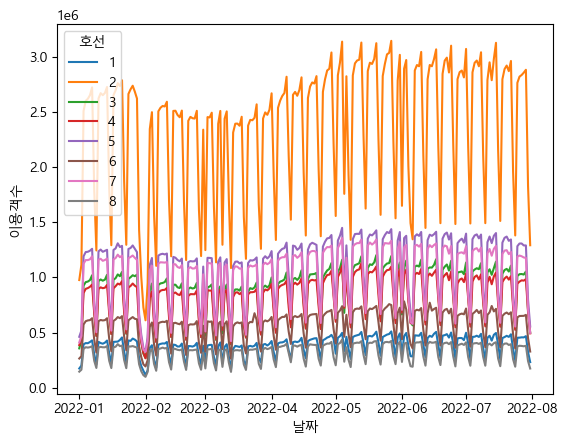

In [85]:
# 시계열 데이터의 시각화 
sns.lineplot(data=agg, 
             x='날짜',
             y='이용객수',
             hue='호선')

#### [실습] df_accident를 활용하여 7, 8월 새벽 1~5시 사고 건수 계산

In [96]:
df_accident = pd.read_csv('data/도로교통공단_사망 교통사고 정보_20211231_utf8.csv')
df_accident

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
0,2021,2021-01-01 03:00,야,금,1,3,0,3,0,경북,...,추돌,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653
1,2021,2021-01-01 09:00,주,금,1,0,0,0,0,충남,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845
2,2021,2021-01-01 15:00,주,금,1,0,0,0,0,강원,...,측면충돌,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842
3,2021,2021-01-01 19:00,야,금,1,0,0,0,0,전남,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391
4,2021,2021-01-01 21:00,야,금,1,0,0,0,0,경기,...,기타,기타,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2021,2021-12-31 16:00,주,금,1,0,0,0,0,경북,...,정면충돌,안전운전 의무 불이행,교차로,교차로내,승용차,이륜차,1119020.0,1766895.0,128.818730,35.891434
2812,2021,2021-12-31 17:00,주,금,1,0,0,0,0,제주,...,추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,940588.0,1503049.6,126.860248,33.517699
2813,2021,2021-12-31 18:00,야,금,1,0,0,0,0,강원,...,횡단중,보행자 보호의무 위반,단일로,기타단일로,승용차,보행자,1023127.0,1982332.0,127.762845,37.840465
2814,2021,2021-12-31 19:00,야,금,1,0,0,0,0,경북,...,횡단중,보행자 보호의무 위반,교차로,교차로횡단보도내,승용차,보행자,1058805.0,1824755.0,128.155943,36.418521


In [110]:
#(1) 월, 시간을 추출해야 한다.
#(2) 특정 시간대 뽑고
#(3) 사고 건수 계산 필요
import pandas as pd
df_accident["발생년월일시"] = pd.to_datetime(df_accident["발생년월일시"])
df_accident['월']=df_accident["발생년월일시"].dt.month
df_accident['시']=df_accident["발생년월일시"].dt.hour

In [111]:
cond_month=df_accident['월'].between(7,8)
cond_hour=df_accident['시'].between(1,5)
df_accident[cond_month&cond_hour].shape[0]

74

<Axes: xlabel='시', ylabel='월'>

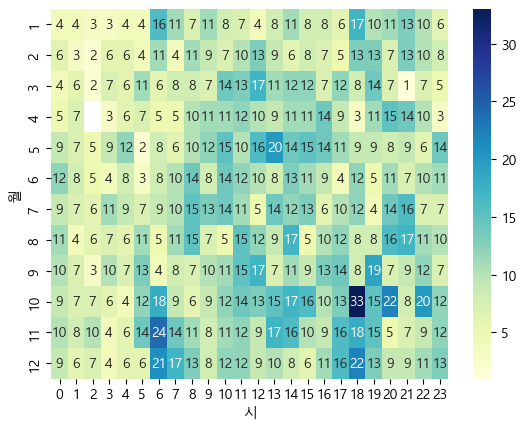

In [116]:
pt=df_accident.pivot_table(values='사망자수',index='월', columns='시', aggfunc='size')
pt.loc[7:8,1:5].sum().sum()

pt=df_accident.pivot_table(values='사망자수',index='월', columns='시', aggfunc='size')
sns.heatmap(pt, cmap='YlGnBu',annot=True)

#### End of script